<a href="https://colab.research.google.com/github/Usman-Bajwa1/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# initialize the seeds of different random number generators so that the
# results will be the same every time the notebook is run
keras.utils.set_random_seed(42)

In [ ]:
df = pd.read_csv("http://storage.googleapis.com/download.tensorflow.org/data/heart.csv")

In [ ]:
df.shape

(303, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [ ]:
categorical_variables = ['sex', 'cp', 'fbs', 'restecg','exang', 'ca', 'thal']
numerics = ['age', 'trestbps','chol', 'thalach', 'oldpeak', 'slope']


With the pandas `get_dummies` function, you can one-hot-encode in one line.


In [ ]:
df = pd.get_dummies(df, columns = categorical_variables)

In [ ]:
df.head()

,age,trestbps,chol,thalach,oldpeak,slope,target,sex_0,sex_1,cp_0,...,exang_1,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible
0,63,145,233,150,2.3,3,0,False,True,False,...,False,True,False,False,False,False,False,True,False,False
1,67,160,286,108,1.5,2,1,False,True,False,...,True,False,False,False,True,False,False,False,True,False
2,67,120,229,129,2.6,2,0,False,True,False,...,True,False,False,True,False,False,False,False,False,True
3,37,130,250,187,3.5,3,0,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,41,130,204,172,1.4,1,0,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
df.target.value_counts(normalize=True)

,proportion
target,
0,0.726073
1,0.273927


In [ ]:
y = df.pop('target')

In [ ]:
y.head()

,target
0,0
1,1
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(df, y, test_size=0.2, stratify=y)

In [ ]:
means = train_X[numerics].mean()
sd = train_X[numerics].std()

In [ ]:
train_X[numerics]= (train_X[numerics] - means)/sd

In [ ]:
test_X[numerics]= (test_X[numerics] - means)/sd

In [ ]:
train_X.head()

,age,trestbps,chol,thalach,oldpeak,slope,sex_0,sex_1,cp_0,cp_1,...,exang_1,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible
180,2.146720,-0.682081,0.373261,-1.172451,-0.740863,-0.938703,True,False,False,False,...,True,False,True,False,False,False,False,False,True,False
99,-0.300109,1.143718,0.912372,1.257355,0.102849,0.672404,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True
190,0.700867,0.116706,-0.277391,-0.149375,1.284047,0.672404,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
110,2.480378,-0.396800,1.023913,0.575304,-0.909606,-0.938703,False,True,False,False,...,True,False,False,False,True,False,False,False,True,False
116,-2.190840,-0.339744,0.614932,0.319535,-0.909606,-0.938703,False,True,False,False,...,True,True,False,False,False,False,False,False,False,True


In [ ]:
train_X = train_X.to_numpy()
test_X = test_X.to_numpy()

In [ ]:
train_X.shape, train_y.shape

((242, 29), (242,))

In [ ]:
test_X.shape, test_y.shape


((61, 29), (61,))

In [ ]:
num_columns = train_X.shape[1]

# define the input layer
input = keras.Input(shape=num_columns)

# feed the input vector to the hidden layer
h = keras.layers.Dense(16, activation="relu", name="Hidden")(input)

# feed the output of the hidden layer to the output layer
output = keras.layers.Dense(1, activation="sigmoid", name="Output")(h)

# tell Keras that this (input,output) pair is your model
model = keras.Model(input, output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 Hidden (Dense)              (None, 16)                480       
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


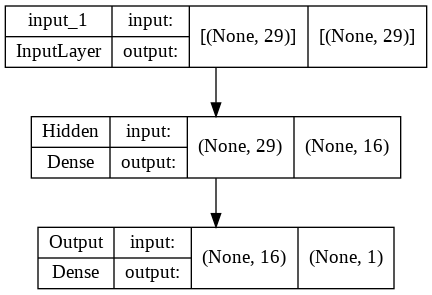

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Let's hand-calculate the number of parameters to verify.

In [ ]:
(29 * 16 + 16) + (16 * 1 + 1)

497

In [ ]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(train_X,
                    train_y,
                    epochs=300,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/300
7/7 [==============================] - 4s 90ms/step - loss: 0.9420 - accuracy: 0.2539 - val_loss: 0.9531 - val_accuracy: 0.2653
Epoch 2/300
7/7 [==============================] - 0s 9ms/step - loss: 0.8751 - accuracy: 0.2798 - val_loss: 0.8972 - val_accuracy: 0.2449
Epoch 3/300
7/7 [==============================] - 0s 8ms/step - loss: 0.8277 - accuracy: 0.3264 - val_loss: 0.8530 - val_accuracy: 0.2245
Epoch 4/300
7/7 [==============================] - 0s 8ms/step - loss: 0.7867 - accuracy: 0.3731 - val_loss: 0.8149 - val_accuracy: 0.3061
Epoch 5/300
7/7 [==============================] - 0s 8ms/step - loss: 0.7492 - accuracy: 0.4197 - val_loss: 0.7792 - val_accuracy: 0.3878
Epoch 6/300
7/7 [==============================] - 0s 9ms/step - loss: 0.7161 - accuracy: 0.4922 - val_loss: 0.7455 - val_accuracy: 0.4286
Epoch 7/300
7/7 [==============================] - 0s 8ms/step - loss: 0.6855 - accuracy: 0.5492 - val_loss: 0.7177 - val_accuracy: 0.4898
Epoch 8/300
7/7 [=========

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

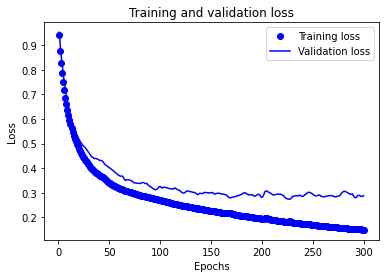

In [ ]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

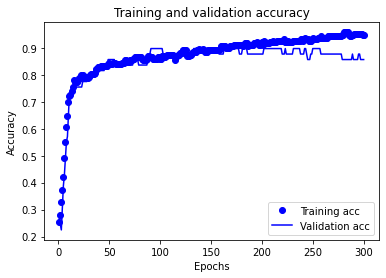

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_X, test_y)

2/2 [==============================] - 0s 8ms/step - loss: 0.3908 - accuracy: 0.8361


[0.39077234268188477, 0.8360655903816223]

In [ ]:
y.value_counts(normalize=True)

0    0.726073
1    0.273927
Name: target, dtype: float64